In [100]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score, recall_score, f1_score, classification_report ,roc_curve, roc_auc_score ,roc_curve, auc, ConfusionMatrixDisplay , RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline


In [3]:
credit_aproval = pd.read_excel('treino.xlsx',index_col=[0])
validation_credit_aproval  = pd.read_excel("teste.xlsx",index_col=[0])

In [4]:
credit_aproval.head() # as variaveis ja sao componentes principais


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,-0.201868,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,-0.005605,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,0.282549,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,-0.110628,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,-0.423634,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0


In [5]:
credit_aproval.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
164227,0.945540,-0.636454,-1.891954,-0.694469,1.006394,1.333040,0.075870,0.200967,-0.551412,0.429079,...,-0.062475,0.457187,-0.036584,-1.154964,-0.020712,0.595263,-0.140924,-0.097852,-0.090685,0
164228,0.069862,0.474324,-1.456827,-1.092415,0.941858,-0.528412,0.862812,0.009045,-0.411747,-0.128967,...,-0.035620,0.655400,-0.946454,-0.159390,-0.458698,0.049198,-0.097779,-0.058269,0.245734,0
164229,1.029171,-0.019496,-0.964276,0.165058,0.135064,-0.367832,-0.086939,0.072412,0.424644,-0.068249,...,-1.968847,0.015673,0.014050,0.441783,0.195901,0.503895,0.151688,-0.192415,-0.153320,0
164230,1.039613,-1.081195,-0.892917,-1.402444,0.276423,2.019006,-1.077950,0.511892,-0.432621,0.768096,...,-0.127359,-0.212865,0.332778,-0.168317,0.150983,0.195624,0.018885,-0.095492,0.054955,0
164231,-0.215879,0.649585,-0.285801,-0.580750,0.570882,-0.629435,0.850776,-0.227290,-0.278489,-0.024727,...,0.361352,0.262834,-0.463130,-0.189906,-0.320088,-0.080870,0.017235,0.029066,0.112815,0


In [6]:
credit_aproval.shape

(164231, 22)

In [7]:
credit_aproval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164231 entries, 1 to 164231
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      164231 non-null  float64
 1   V2      164231 non-null  float64
 2   V3      164231 non-null  float64
 3   V4      164231 non-null  float64
 4   V5      164231 non-null  float64
 5   V6      164231 non-null  float64
 6   V7      164231 non-null  float64
 7   V8      164231 non-null  float64
 8   V9      164231 non-null  float64
 9   V10     164231 non-null  float64
 10  V11     164231 non-null  float64
 11  V12     164231 non-null  float64
 12  V13     164231 non-null  float64
 13  V14     164231 non-null  float64
 14  V15     164231 non-null  float64
 15  V16     164231 non-null  float64
 16  V17     164231 non-null  float64
 17  V18     164231 non-null  float64
 18  V19     164231 non-null  float64
 19  V20     164231 non-null  float64
 20  V21     164231 non-null  float64
 21  Class   16

In [8]:
credit_aproval.isna().any()

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
Class    False
dtype: bool

In [9]:
print(credit_aproval.describe())

                  V1             V2             V3             V4  \
count  164231.000000  164231.000000  164231.000000  164231.000000   
mean        0.020816       0.029036       0.274890       0.023903   
std         0.709996       0.592437       0.580047       0.631710   
min       -14.903862     -19.758520      -9.861436      -2.631825   
25%        -0.445887      -0.296836      -0.048311      -0.398327   
50%        -0.026290       0.023532       0.359776       0.018997   
75%         0.590285       0.422750       0.651813       0.456228   
max         1.215247       8.034236       3.072789       6.134471   

                  V5             V6             V7             V8  \
count  164231.000000  164231.000000  164231.000000  164231.000000   
mean       -0.063158       0.087255      -0.061199       0.081759   
std         0.547314       0.615860       0.414050       0.371658   
min       -18.795629      -8.178917     -10.938095     -14.285038   
25%        -0.422133      -0.3112

<AxesSubplot:>

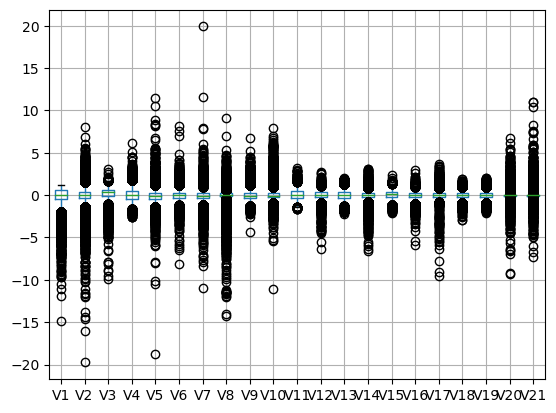

In [10]:
credit_aproval.iloc[:,:-1].boxplot() # muitos outliers

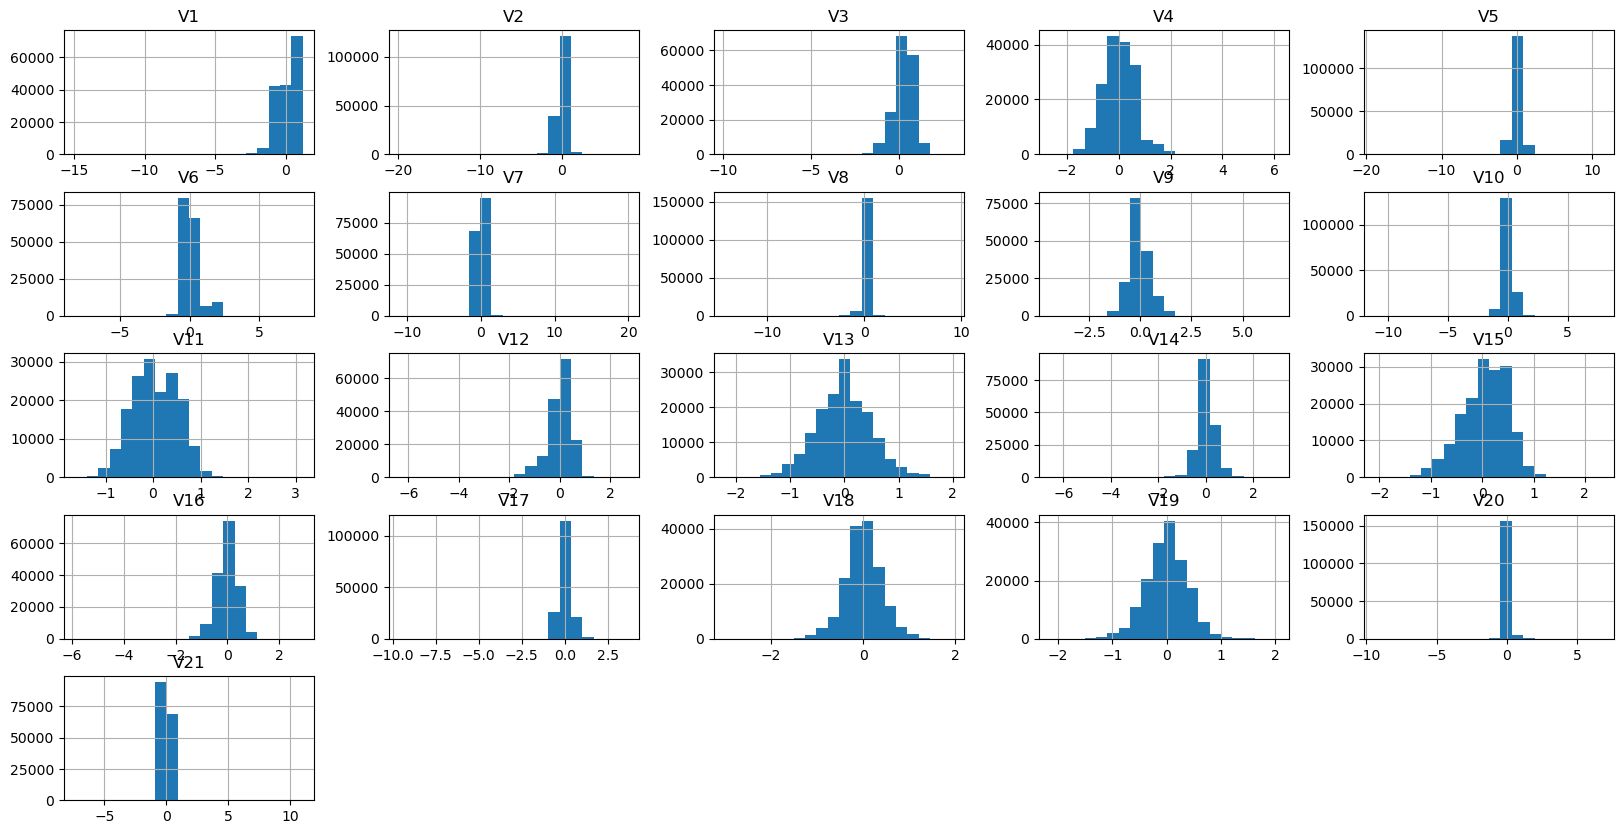

In [12]:
credit_aproval.drop("Class",axis=1).hist(bins=20)
plt.gcf().set_size_inches(20, 10)

In [13]:
credit_aproval['Class'].value_counts()/  credit_aproval.shape[0]

0    0.997851
1    0.002149
Name: Class, dtype: float64

In [14]:

from scipy import stats


for col in credit_aproval.drop("Class",axis=1):
    print("#" *100)
    print(col)
    x = credit_aproval[col].values
    y = credit_aproval['Class'].values

    # Calculate the Point-Biserial Correlation Coefficient
    pb_coeff, p_value = stats.pointbiserialr(x, y)

    print(f"Point-Biserial Correlation Coefficient: {pb_coeff:.4f}")
    print(f"p-value: {p_value:.4f}")


####################################################################################################
V1
Point-Biserial Correlation Coefficient: -0.0364
p-value: 0.0000
####################################################################################################
V2
Point-Biserial Correlation Coefficient: 0.0120
p-value: 0.0000
####################################################################################################
V3
Point-Biserial Correlation Coefficient: -0.0541
p-value: 0.0000
####################################################################################################
V4
Point-Biserial Correlation Coefficient: 0.0283
p-value: 0.0000
####################################################################################################
V5
Point-Biserial Correlation Coefficient: 0.0090
p-value: 0.0003
####################################################################################################
V6
Point-Biserial Correlation Coefficient: -0.0068
p-value: 0.

<AxesSubplot:>

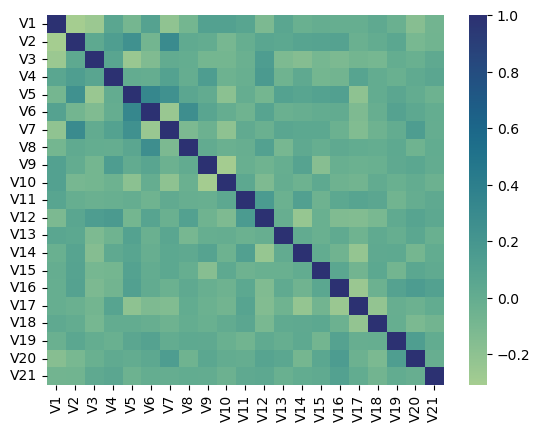

In [15]:
sns.heatmap(credit_aproval.iloc[:,:-1].corr(),cmap="crest") # variaveis sao pouco correlacionadas  entre si

<AxesSubplot:>

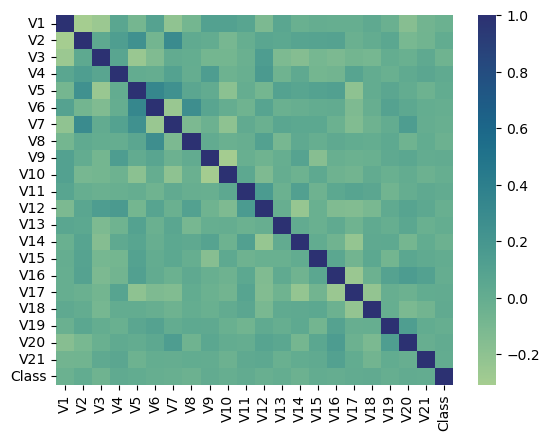

In [98]:
sns.heatmap(credit_aproval.corr(),cmap="crest") # variaveis sao pouco correlacionadas 

In [16]:
credit_aproval

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,-0.201868,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,-0.005605,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,0.282549,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,-0.110628,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,-0.423634,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164227,0.945540,-0.636454,-1.891954,-0.694469,1.006394,1.333040,0.075870,0.200967,-0.551412,0.429079,...,-0.062475,0.457187,-0.036584,-1.154964,-0.020712,0.595263,-0.140924,-0.097852,-0.090685,0
164228,0.069862,0.474324,-1.456827,-1.092415,0.941858,-0.528412,0.862812,0.009045,-0.411747,-0.128967,...,-0.035620,0.655400,-0.946454,-0.159390,-0.458698,0.049198,-0.097779,-0.058269,0.245734,0
164229,1.029171,-0.019496,-0.964276,0.165058,0.135064,-0.367832,-0.086939,0.072412,0.424644,-0.068249,...,-1.968847,0.015673,0.014050,0.441783,0.195901,0.503895,0.151688,-0.192415,-0.153320,0


----------

# Regressão Logística simples:

- Sem realizar downsampling ou upsampling

In [17]:
X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 42)


In [92]:
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])

test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])

# check the proportions
print(train_1/y_train.shape[0]) 
print(test_1/y_test.shape[0])

0.0021920744331051954
0.002135190868202705


In [52]:
logReg_v1 = LogisticRegression(class_weight='balanced')
logReg_v1.fit(X_train,y_train)
y_pred_train =  logReg_v1.predict(X_train)
y_pred_test =  logReg_v1.predict(X_test)

y_pred_train_proba =  logReg_v1.predict_proba(X_train)
y_pred_test_proba =  logReg_v1.predict_proba(X_test)

In [55]:
y_pred_test_proba[:, 1]

array([0.15691499, 0.14210965, 0.8905477 , ..., 0.54494009, 0.2644752 ,
       0.97722686])

In [56]:
# Calculando a ROC e o Gini - Treinamento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_proba[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

print("AUC - Treinamento : %f" % roc_auc_train)
print("Gini - Treinamento: ", round(2*roc_auc_train-1,2))
print("\n")

# Calculando a ROC e o Gini - Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_proba[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Teste : %f" % roc_auc_test)
print("Gini - Teste: ", round(2*roc_auc_test-1,2))

AUC - Treinamento : 0.861217
Gini - Treinamento:  0.72


AUC - Teste : 0.775875
Gini - Teste:  0.55


In [67]:
def get_metrics(model,y_true,X_true):
    y_pred =  model.predict(X_true)
    y_pred_proba =  model.predict_proba(X_true)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1] )
    auc = roc_auc_score(y_true, y_pred_proba[:, 1] )
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    metrics = {
        'Accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'F1-Score' : f1,
        'False Positive Ratio': fpr,
        'True Positive Ratio':tpr,
        'Thresholds':thresholds,
        'Area Under the Curve': auc,
        "Gini": round(2*auc-1,2),
        'Confussion Matrix' : cm,
        'Classification Report' : report

    }

    

    return metrics



In [81]:
def  display_metrics(train_metrics_report,test_metrics_report,not_show=['Confussion Matrix','Classification Report','False Positive Ratio','True Positive Ratio','Thresholds']):
    for k in train_metrics_report.keys():
        if k not in not_show:
            print(k, " - Train : ", round(train_metrics_report[k],4))
            print(k, " - Test : ", round(test_metrics_report[k],4))
            print("-"*100)


In [82]:
train_metrics = get_metrics(logReg_v1,y_train,X_train)
test_metrics = get_metrics(logReg_v1,y_test,X_test)

In [83]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.8626
Accuracy  - Test :  0.8617
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0113
Precision  - Test :  0.0077
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.7111
Recall  - Test :  0.4981
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0222
F1-Score  - Test :  0.0151
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8612
Area Under the Curve  - Test :  0.7759
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.72
Gini  - Test :  0.55
----------------------------------------------------------------------------------------------------


In [87]:
from matplotlib import pyplot as plt
def plot_classification_metrics(model,y_true,X_true):
    y_pred =  model.predict(X_true)
    fig, (ax1, ax2)= plt.subplots(1,2, figsize=(12, 6))
    RocCurveDisplay.from_estimator(model, X_true, y_true).plot(ax=ax2)

    ax2.plot([0,1],[0,1],'k--',label='Benchmark')
    ax2.set_title('ROC Curve Prediction')
    ax2.legend()
    
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
    ConfusionMatrixDisplay(confusion_matrix = conf_matrix).plot(ax=ax1)
    ax1.set_title('Matrix Curve')

    plt.close()


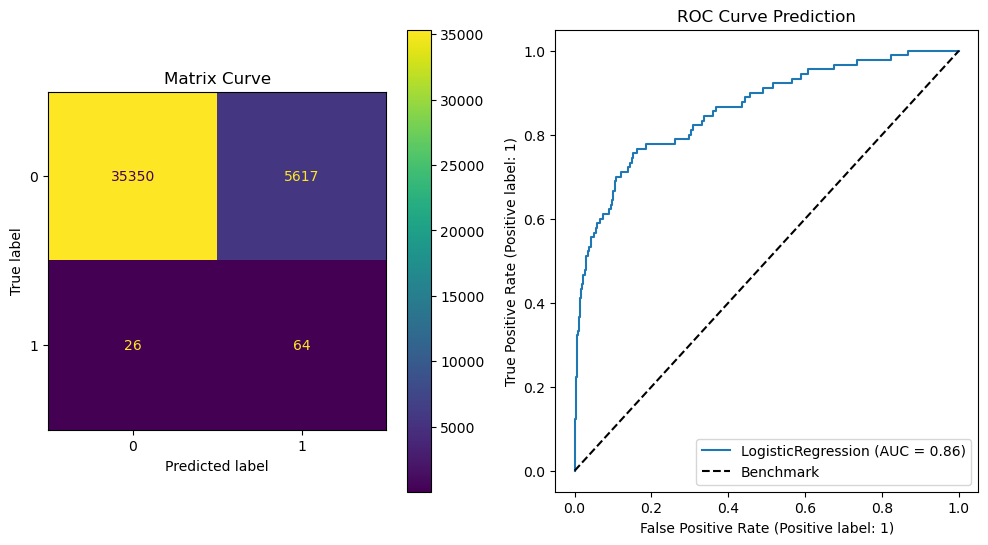

In [88]:
plot_classification_metrics(logReg_v1,y_train,X_train)

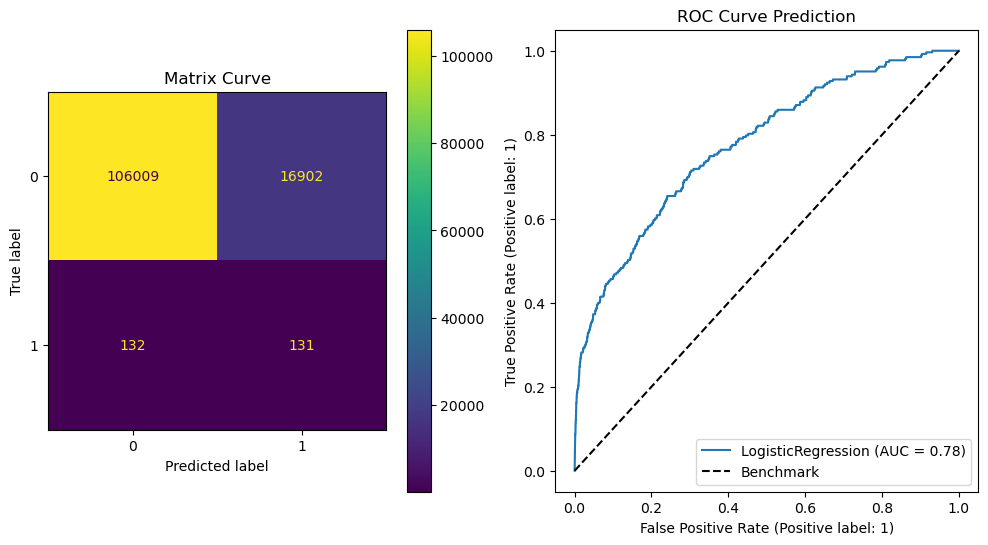

In [89]:
plot_classification_metrics(logReg_v1,y_test,X_test)

# Grid search Logistc Regression

In [96]:


pipe_lr = make_pipeline(LogisticRegression(class_weight='balanced'))

strat_kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


auc_scores = cross_val_score(estimator=pipe_lr, X=X, y=y,cv=strat_kfold,n_jobs=-1,scoring='roc_auc')


# Print the AUC scores for each fold
print('AUC scores:', auc_scores)

# Compute the mean AUC score across all folds
mean_auc = auc_scores.mean()
print('Mean AUC:', mean_auc)

AUC scores: [0.73819258 0.84887897 0.79111894 0.76563688 0.7950992  0.78288295
 0.87913107 0.82606437 0.80396215 0.80779649]
Mean AUC: 0.8038763594727202


In [105]:
X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)



strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}



# Step 2: Perform cross-validation with hyperparameter tuning
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear'), params_log_reg, cv=strat_kfold, scoring='roc_auc',n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

best_log_reg = grid_search_log_reg.best_estimator_


In [107]:
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [108]:
train_metrics = get_metrics(best_log_reg,y_train,X_train)
test_metrics = get_metrics(best_log_reg,y_test,X_test)

In [110]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.8596
Accuracy  - Test :  0.8591
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0095
Precision  - Test :  0.0072
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.7333
Recall  - Test :  0.4644
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0187
F1-Score  - Test :  0.0142
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.9007
Area Under the Curve  - Test :  0.721
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.8
Gini  - Test :  0.44
----------------------------------------------------------------------------------------------------


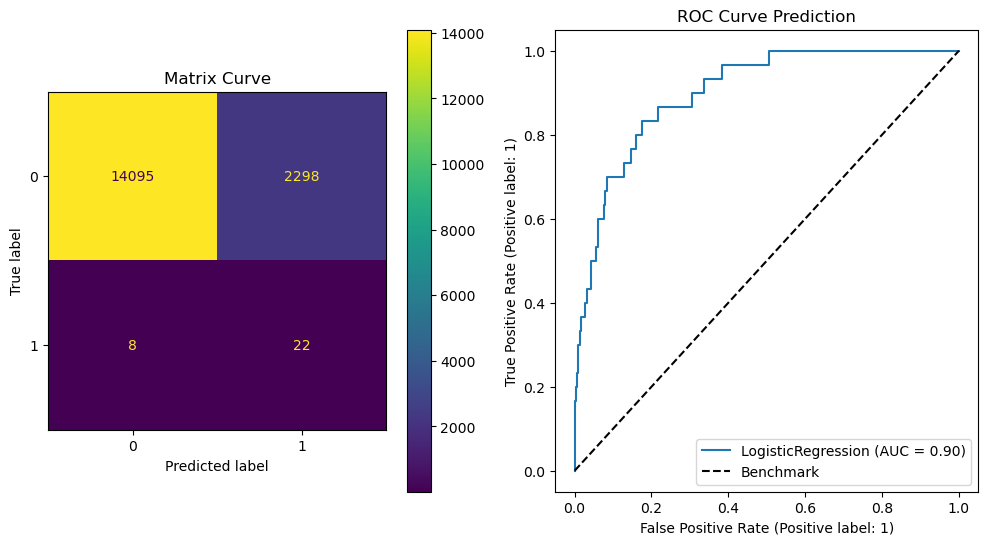

In [111]:
plot_classification_metrics(best_log_reg,y_train,X_train)

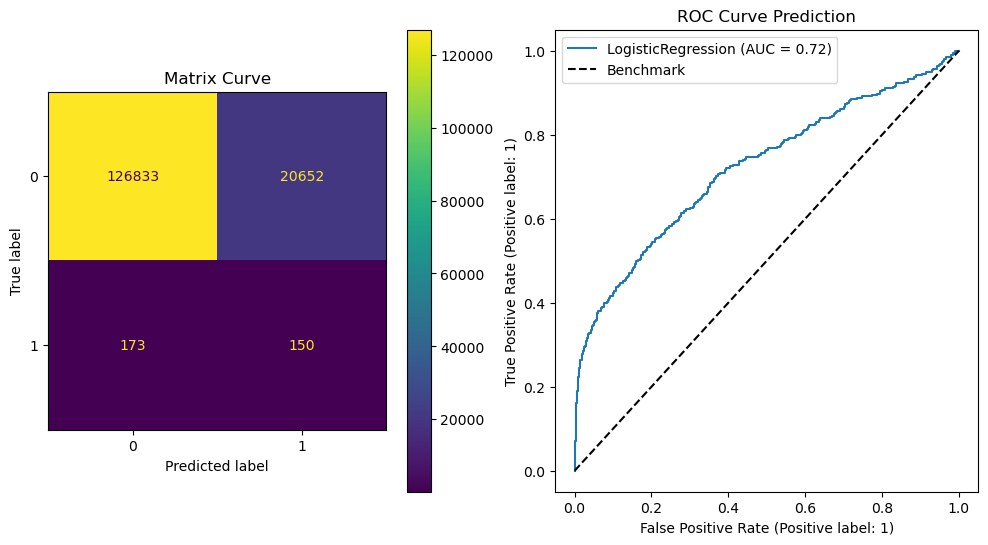

In [112]:
plot_classification_metrics(best_log_reg,y_test,X_test)

--------------------

# Dealing Data Proportions